In [1]:
import os
import re

In [2]:
log_file = (open('../log/model.log')).read()

In [3]:
log_file

'2021-07-21 13:57:56,977 INFO INIT: #stock: 100, #vocab+1: 29867\n2021-07-21 13:57:56,978 INFO Start graph assembling...\n2021-07-21 13:58:10,118 INFO ASSEMBLE: word table #replacement: 19482\n2021-07-21 13:58:10,244 INFO Word table init: done!\n2021-07-21 13:58:10,244 INFO Model: all_days-5.msgs-30-words-40_word_embed-glove.vmd_in-hedge_alpha-0.5.anneal-0.005.rec-zh_batch-32.opt-adam.lr-0.001-drop-0.3-cell-gru, start a new session!\n2021-07-21 13:58:10,244 INFO Epoch: 1/15 start\n2021-07-21 13:58:10,246 INFO start to collect a batch...\n2021-07-21 13:58:26,471 INFO start to collect a batch...\n2021-07-21 13:58:28,223 INFO start to collect a batch...\n2021-07-21 13:58:32,016 INFO start to collect a batch...\n2021-07-21 13:58:33,798 INFO start to collect a batch...\n2021-07-21 13:58:37,427 INFO start to collect a batch...\n2021-07-21 13:58:45,266 INFO start to collect a batch...\n2021-07-21 13:58:46,889 INFO start to collect a batch...\n2021-07-21 13:58:48,481 INFO start to collect a ba

In [4]:
logs = log_file.split('\n')

In [5]:
logs

['2021-07-21 13:57:56,977 INFO INIT: #stock: 100, #vocab+1: 29867',
 '2021-07-21 13:57:56,978 INFO Start graph assembling...',
 '2021-07-21 13:58:10,118 INFO ASSEMBLE: word table #replacement: 19482',
 '2021-07-21 13:58:10,244 INFO Word table init: done!',
 '2021-07-21 13:58:10,244 INFO Model: all_days-5.msgs-30-words-40_word_embed-glove.vmd_in-hedge_alpha-0.5.anneal-0.005.rec-zh_batch-32.opt-adam.lr-0.001-drop-0.3-cell-gru, start a new session!',
 '2021-07-21 13:58:10,244 INFO Epoch: 1/15 start',
 '2021-07-21 13:58:10,246 INFO start to collect a batch...',
 '2021-07-21 13:58:26,471 INFO start to collect a batch...',
 '2021-07-21 13:58:28,223 INFO start to collect a batch...',
 '2021-07-21 13:58:32,016 INFO start to collect a batch...',
 '2021-07-21 13:58:33,798 INFO start to collect a batch...',
 '2021-07-21 13:58:37,427 INFO start to collect a batch...',
 '2021-07-21 13:58:45,266 INFO start to collect a batch...',
 '2021-07-21 13:58:46,889 INFO start to collect a batch...',
 '2021-07

In [6]:
logs_info = [sent.split(' INFO ')[1] for sent in logs if 'INFO' in sent ]

In [7]:
logs_info

['INIT: #stock: 100, #vocab+1: 29867',
 'Start graph assembling...',
 'ASSEMBLE: word table #replacement: 19482',
 'Word table init: done!',
 'Model: all_days-5.msgs-30-words-40_word_embed-glove.vmd_in-hedge_alpha-0.5.anneal-0.005.rec-zh_batch-32.opt-adam.lr-0.001-drop-0.3-cell-gru, start a new session!',
 'Epoch: 1/15 start',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 'start to collect a batch...',
 '\titer: 20, batch loss: 7.053

In [8]:
epoch_evals = [sent for sent in logs_info if sent.startswith('Epoch: loss: ')]

In [9]:
epoch_evals

['Epoch: loss: 3.448331, acc: 0.653111',
 'Epoch: loss: 1.578802, acc: 0.741978',
 'Epoch: loss: 1.399773, acc: 0.664760',
 'Epoch: loss: 1.238886, acc: 0.586635',
 'Epoch: loss: 1.133541, acc: 0.553502',
 'Epoch: loss: 1.093755, acc: 0.535086',
 'Epoch: loss: 1.077288, acc: 0.529785',
 'Epoch: loss: 1.066051, acc: 0.526367',
 'Epoch: loss: 1.060676, acc: 0.530343',
 'Epoch: loss: 1.054550, acc: 0.535505',
 'Epoch: loss: 1.053071, acc: 0.529297',
 'Epoch: loss: 1.048777, acc: 0.541085',
 'Epoch: loss: 1.046889, acc: 0.539969',
 'Epoch: loss: 1.045007, acc: 0.543108',
 'Epoch: loss: 1.044062, acc: 0.545131']

In [10]:
len(epoch_evals)

15

In [11]:
epoch_loss = [float(re.findall('loss: (\d+\.\d+),',sent)[0]) for sent in epoch_evals]
epoch_acc = [float(re.findall('acc: (\d+\.\d+)',sent)[0]) for sent in epoch_evals]

In [12]:
epoch_loss

[3.448331,
 1.578802,
 1.399773,
 1.238886,
 1.133541,
 1.093755,
 1.077288,
 1.066051,
 1.060676,
 1.05455,
 1.053071,
 1.048777,
 1.046889,
 1.045007,
 1.044062]

In [13]:
epoch_acc

[0.653111,
 0.741978,
 0.66476,
 0.586635,
 0.553502,
 0.535086,
 0.529785,
 0.526367,
 0.530343,
 0.535505,
 0.529297,
 0.541085,
 0.539969,
 0.543108,
 0.545131]

In [14]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


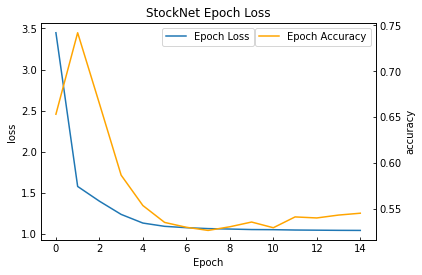

In [25]:
fig, ax1 = plt.subplots()

ax1.plot(epoch_loss,label='Epoch Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('loss')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.plot(epoch_acc,label='Epoch Accuracy',color='orange')
ax2.set_ylabel('accuracy')
ax2.tick_params(axis='both', direction='in')


ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
plt.title('StockNet Epoch Loss')
plt.show()

In [26]:
logs_info[-1]

'\tEval, eval loss: 1.0579830408096313, acc: 0.503675'